# Lab 5 - General Linear Models: Logistic regression

In [71]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

#### Read data from csv file

In [72]:
#data = ...
data = pd.read_csv('logistic_reg_data.csv')
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,249.500000,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,144.481833,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,0.000000,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,124.750000,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,249.500000,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,374.250000,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,499.000000,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


### Prior selection


In [73]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [74]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 1.

1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

In [75]:
data_ppc2= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=5)
sim_ppc2=model_ppc1.sample(data=data_ppc2, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

data_ppc3= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc3=model_ppc1.sample(data=data_ppc3, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

data_ppc4= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=0.75)
sim_ppc4=model_ppc1.sample(data=data_ppc4, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)     

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


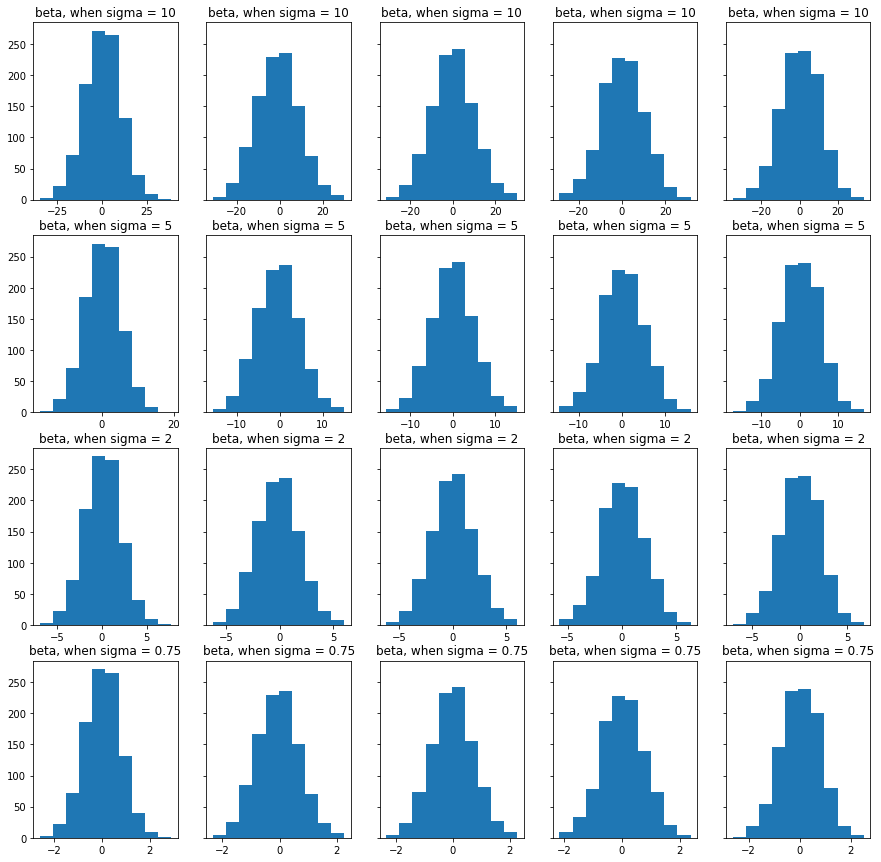

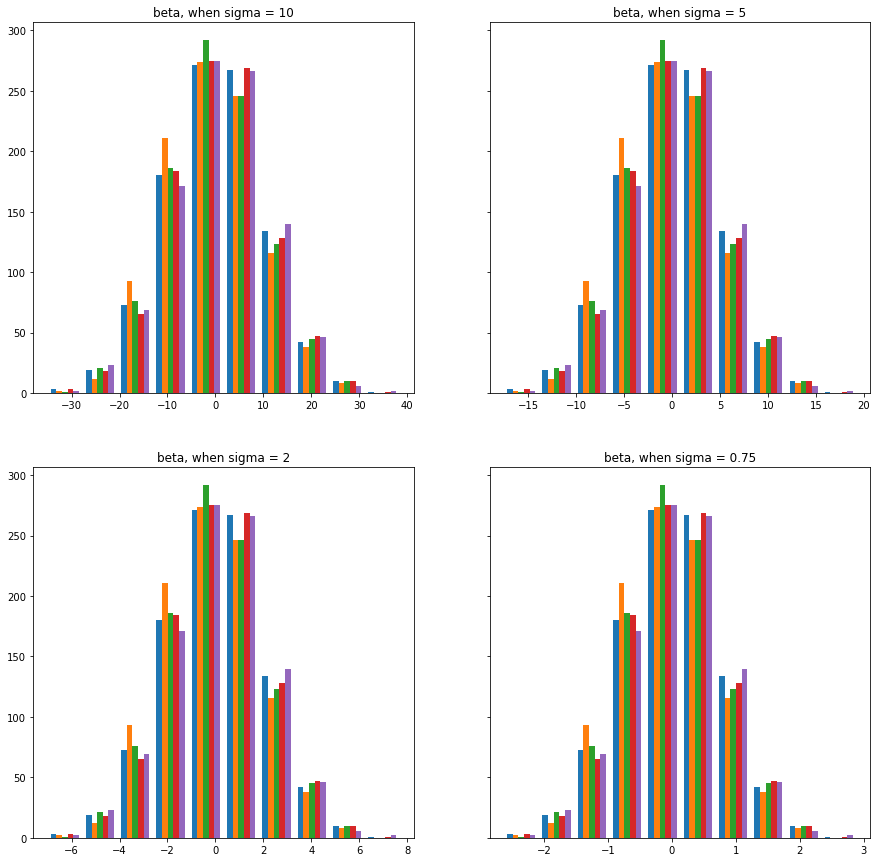

In [76]:
fig, axs = plt.subplots(4, 5, sharey="row", figsize=(15,15))
axs = np.asarray(axs)

sims = [sim_ppc1, sim_ppc2, sim_ppc3, sim_ppc4]
sigms = [10, 5, 2, 0.75]
for ax, sim, sigm in zip(axs, sims, sigms):
    beta = sim.stan_variable('beta')
    for i in range(beta.shape[-1]):
        ax[i].hist(beta[:, i])
        ax[i].set_title(f'beta, when sigma = {sigm}')

plt.show()

fig, axs = plt.subplots(2, 2, sharey="row", figsize=(15,15))

for ax, sim, sigm in zip(axs.flatten(), sims, sigms):
    ax.hist(sim.stan_variable('beta'))
    ax.set_title(f'beta, when sigma = {sigm}')

plt.show()

### Posterior inference

In [77]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [78]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:04 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:05 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:06 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:06 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:07 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:07 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:08 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:08 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:08 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:09 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:09 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:10 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊   | 00:10 Iteration: 1200 / 2000 [ 60%]


INFO:cmdstanpy:CmdStan done processing.


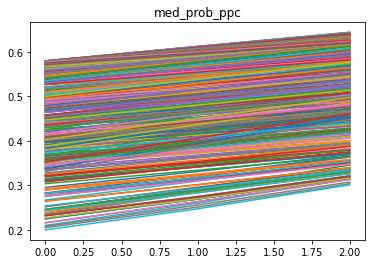

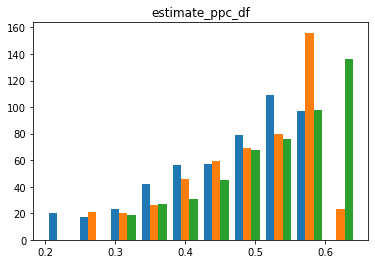

In [79]:
#plot
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])
plt.plot(med_prob_ppc)
plt.title('med_prob_ppc')
plt.show()
plt.hist(estimate_ppc_df)
plt.title('estimate_ppc_df')
plt.show()

#### Task 2.

1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model
3. Plot the probability of individual outcome:
- plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)
- to plot its error bars take into consider its 25th, 50th and 75th percentile
- also mark the real value of y, by different colored dots (for mean values)
    
4. Consider if the probability was well captured by each setting

In [80]:
#new prior model has not been created, but values used as prior were changed
model_changed = CmdStanModel(stan_file='logistic_regression_beta_alpha_2.stan')

data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:06 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:07 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:07 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:08 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:09 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:09 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:09 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |████▌     | 00:10 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:10 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |█████▉    | 00:11 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:11 Iteration: 1100 / 2000 [ 55%]  (Sampling)


cha


INFO:cmdstanpy:CmdStan done processing.


0.521179124


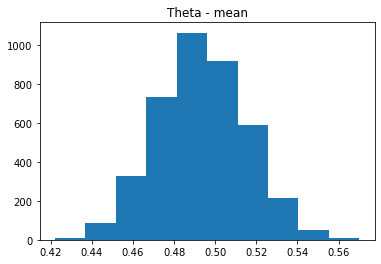

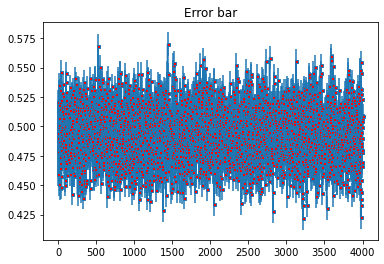

In [88]:
theta = fit.stan_variable('prob_ppc')
y_ppc = fit.stan_variable('y_ppc')
# print(theta)
print(np.mean(theta[0, :]))

theta_mean = np.mean(theta, axis=1)
plt.hist(theta_mean)
plt.title('Theta - mean')
plt.show()

x = np.linspace(0, theta_mean.shape[0], theta_mean.shape[0])
y = theta_mean
errors = np.ones_like(theta_mean)*0.01

plt.errorbar(x, y, errors, marker='s', mfc='red', ms=3)
plt.title('Error bar')
plt.show()

C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_16988\3615196482.py:3: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('data from model', 'real data')
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_16988\3615196482.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('data from model', 'real data')
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_16988\3615196482.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('data from model', 'real data')
C:\Users\Agni

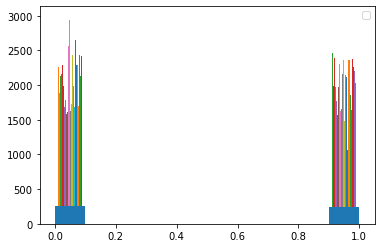

In [95]:
plt.hist(y_ppc)
plt.hist(data['y'])
plt.legend('data from model', 'real data')
plt.show()

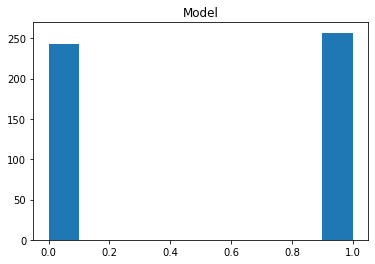

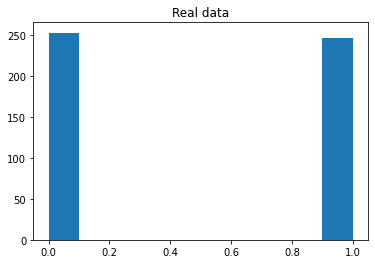

In [98]:
plt.hist(y_ppc[1])
plt.title('Model')
plt.show()
plt.hist(data['y'])
plt.title('Real data')
plt.show()

## the model is quite good - result from the model are pretty much the same as the real one

(array([  6.,   8.,  23.,  43., 108., 175., 260., 348., 465., 520., 467.,
        464., 408., 272., 188., 138.,  64.,  25.,  14.,   4.]),
 array([0.48165625, 0.4908866 , 0.50011695, 0.5093473 , 0.51857765,
        0.527808  , 0.53703835, 0.5462687 , 0.55549905, 0.5647294 ,
        0.57395975, 0.5831901 , 0.59242045, 0.6016508 , 0.61088115,
        0.6201115 , 0.62934185, 0.6385722 , 0.64780255, 0.6570329 ,
        0.66626325]),
 <BarContainer object of 20 artists>)

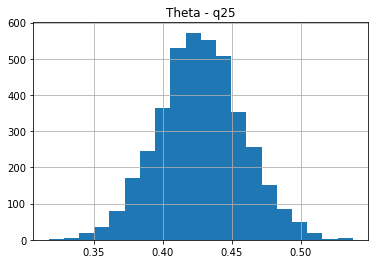

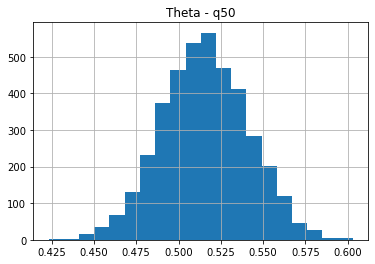

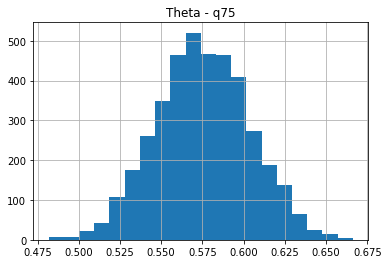

In [82]:
q25 =[]
q50 =[]
q75 =[]

x=0
for i in theta:
    q25.append(np.quantile(theta[x],0.25))
    q50.append(np.quantile(theta[x],0.50))
    q75.append(np.quantile(theta[x],0.75))
    x=x+1

fig, ax = plt.subplots()
plt.title("Theta - q25")
plt.grid()
ax.hist(q25, bins =20)

fig, ax = plt.subplots()
plt.title("Theta - q50")
plt.grid()
ax.hist(q50, bins =20)

fig, ax = plt.subplots()
plt.title("Theta - q75")
plt.grid()
ax.hist(q75, bins =20)

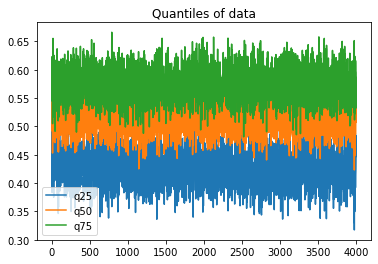

In [84]:
plt.plot(q25)
plt.plot(q50)
plt.plot(q75)
plt.legend(['q25','q50','q75'])
plt.title("Quantiles of data")
plt.show()